In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
os.chdir('/Users/kevin/git/movieAnalytics')

In [2]:
ratings = pd.read_csv('./data/ratings.csv')
#links_small = pd.read_csv('./data/links_small.csv')
links = pd.read_csv('./data/links.csv')
movies = pd.read_csv('./data/movies_metadata.csv')
ratings_small = pd.read_csv('./data/ratings_small.csv')
_credits = pd.read_csv('./data/credits.csv')
keywords = pd.read_csv('./data/keywords.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [4]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
links.describe()

,movieId,imdbId,tmdbId
count,45843.000000,4.584300e+04,45624.000000
mean,96578.775626,9.937080e+05,108661.382847
std,57216.863469,1.361924e+06,112665.970830
min,1.000000,1.000000e+00,2.000000
25%,49202.500000,8.333050e+04,26502.750000
50%,108799.000000,2.839910e+05,60178.000000
75%,145270.500000,1.538311e+06,157849.500000
max,176279.000000,7.158814e+06,469172.000000


In [7]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
#bad data-- just remove this because it doesn't have the budget and title of the movie anyway
movies = movies[movies['id'].str.isnumeric()]

In [9]:
movies['id'] = movies['id'].astype(int)

In [10]:
movies = movies.dropna(subset=['imdb_id'])
movies['imdb_id'] = movies['imdb_id'].str.replace('tt', '', regex=True).astype(int)

In [11]:
movies.describe()

,id,imdb_id,revenue,runtime,vote_average,vote_count
count,45446.000000,4.544600e+04,4.544300e+04,45188.000000,45443.000000,45443.000000
mean,108347.577521,9.924220e+05,1.121354e+07,94.135899,5.618760,109.935502
std,112447.494214,1.361618e+06,6.434391e+07,38.400560,1.923305,491.398232
min,2.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,26441.750000,8.299350e+04,0.000000e+00,85.000000,5.000000,3.000000
50%,60002.500000,2.832625e+05,0.000000e+00,95.000000,6.000000,10.000000
75%,157304.000000,1.536047e+06,0.000000e+00,107.000000,6.800000,34.000000
max,469172.000000,7.158814e+06,2.787965e+09,1256.000000,10.000000,14075.000000


In [42]:
#Convert release date to date time and normalize the genre and spoken languages by using movieID as foreign key
'''
movies['genres'] = movies['genres'].fillna('[]')
movies['genres'] = movies['genres'].apply(eval)
movies['spoken_languages'] = movies['spoken_languages'].fillna('[]')
movies['spoken_languages'] = movies['spoken_languages'].apply(eval)
movies['production_companies'] = movies['production_companies'].fillna('[]')
movies['production_companies'] = movies['production_companies'].apply(eval)
movies['production_countries'] = movies['production_countries'].fillna('[]')
movies['production_countries'] = movies['production_countries'].apply(eval)
'''

#Data contains missing information. Once normalized, these missing information will no longer be taken into consideration.
languages_table = pd.DataFrame(columns={'movieID', 'name'})
genres_table = pd.DataFrame(columns={'movieID', 'name'})
production_company_table = pd.DataFrame(columns={'movieID', 'name'})
production_countries_table = pd.DataFrame(columns={'movieID', 'name'})
for index, row in movies.iterrows():
    try:
        genres = pd.DataFrame(columns={'movieID', 'name'})
        genres['name'] = pd.json_normalize(row['genres'])['name']
        genres['movieID'] = row["id"]
        genres_table = genres_table.append(genres)
    except:
        pass

    try:
        spoken_languages = pd.DataFrame(columns={'movieID', 'name'})
        spoken_languages['name'] = pd.json_normalize(row['spoken_languages'])['name']
        spoken_languages['movieID'] = row["id"]
        languages_table = languages_table.append(spoken_languages)
    except:
        pass

    try:
        production_company= pd.DataFrame(columns={'movieID', 'name'})
        production_company['name'] = pd.json_normalize(row['production_companies'])['name']
        production_company['movieID'] = row["id"]
        production_company_table = production_company_table.append(production_company)
    except:
        pass

    try:
        production_countries = pd.DataFrame(columns={'movieID', 'name'})
        production_countries['name'] = pd.json_normalize(row['production_countries'])['name']
        production_countries['movieID'] = row["id"]
        production_countries_table = production_countries_table.append(production_countries)
    except:
        pass

In [46]:
#Check if the table generates the correct data
genres_table[genres_table['movieID']==9273]

,movieID,name
0,9273,Crime
1,9273,Comedy
2,9273,Adventure


In [47]:
languages_table[languages_table['movieID']== 1710]

,movieID,name
0,1710,English
1,1710,Deutsch


In [48]:
production_company_table[production_company_table['movieID']== 1710]

,movieID,name
0,1710,Regency Enterprises
1,1710,New Regency Pictures


In [49]:
production_countries_table[production_countries_table['movieID']== 1710]

,movieID,name
0,1710,United States of America


In [17]:
_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [18]:
_credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [19]:
#normalize cast and crew by using movieID as foreign key
_credits['cast'] = _credits['cast'].apply(eval)
_credits['crew'] = _credits['crew'].apply(eval)
cast_table = pd.DataFrame(columns={'movieID', 'name','character', 'gender'})
crew_table = pd.DataFrame(columns={'movieID', 'name', 'department', 'gender'})
for index, row in _credits.iterrows():
    try:
        cast = pd.DataFrame(columns={'movieID', 'name','character', 'gender'})
        cast[['name','character', 'gender']] = pd.json_normalize(row['cast'])[['name','character', 'gender']]
        cast['movieID'] = row["id"]
        cast_table  = cast_table.append(cast)
    except:
        pass

    try:
        crew = pd.DataFrame(columns={'movieID', 'name', 'department', 'gender'})
        crew[['name', 'department', 'gender']] = pd.json_normalize(row['crew'])[['name', 'department', 'gender']]
        crew['movieID'] = row["id"]
        crew_table  = crew_table.append(crew)
    except:
        pass

In [20]:
crew_table.head()

,movieID,department,gender,name
0,862,Directing,2,John Lasseter
1,862,Writing,2,Joss Whedon
2,862,Writing,2,Andrew Stanton
3,862,Writing,2,Joel Cohen
4,862,Writing,0,Alec Sokolow


In [21]:
cast_table.head()

,movieID,gender,character,name
0,862,2,Woody (voice),Tom Hanks
1,862,2,Buzz Lightyear (voice),Tim Allen
2,862,2,Mr. Potato Head (voice),Don Rickles
3,862,2,Slinky Dog (voice),Jim Varney
4,862,2,Rex (voice),Wallace Shawn


In [22]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [23]:
keywords.describe()

,id
count,46419.000000
mean,109769.951873
std,113045.780256
min,2.000000
25%,26810.500000
50%,61198.000000
75%,159908.500000
max,469172.000000


In [41]:
#normalize keywords by using movieID as foreign key
#keywords['keywords'] = keywords['keywords'].apply(eval)

keywords_table = pd.DataFrame(columns={'movieID', 'name'})
for index, row in keywords.iterrows():
    try:
        keyword = pd.DataFrame(columns={'movieID', 'name'})
        keyword['name'] = pd.json_normalize(row['keywords'])['name']
        keyword['movieID'] = row["id"]
        keywords_table = keywords_table.append(keyword)
    except:
        pass

In [50]:
keywords_table

,movieID,name
0,862,jealousy
1,862,toy
2,862,boy
3,862,friendship
4,862,friends
...,...,...
4,289923,mockumentary
0,439050,tragic love
0,111109,artist
1,111109,play


In [ ]:
######### Data Analysis Part #########

In [51]:
#convert budget to int and calculate profit. This assumes that the movie are within budget
movies['budget'] = movies['budget'].astype(int)
movies['profit'] = movies['revenue']-movies['budget']

In [116]:
#Remove entries that have 0 budget. This is most likely an error because a movie could not have been produced without budget
profitability = movies[(movies['budget']>0)&(movies['revenue']>0)][['id', 'imdb_id','budget','profit','revenue', 'release_date']]

In [117]:
#get the movie id from the links data frame
profitability = profitability.merge(links,how='inner', left_on='id', right_on='tmdbId', suffixes=['', ''])

In [56]:
#convert movieID into int. Remove entries with date tyoe
#genres_table = genres_table[genres_table['movieID'].str.isnumeric()]
genres_table['movieID']=genres_table['movieID'].astype(int)

In [57]:
#join genres and profitability table
profitability = profitability.merge(genres_table,how='inner', left_on='id', right_on='movieID', suffixes=['', ''])

In [58]:
profitability.describe()

,id,imdb_id,budget,profit,revenue,movieId,imdbId,tmdbId,movieID
count,14128.000000,1.412800e+04,1.412800e+04,1.412800e+04,1.412800e+04,14128.000000,1.412800e+04,14128.000000,14128.000000
mean,56390.601076,8.077758e+05,3.510699e+07,6.647979e+07,1.015868e+08,51236.045229,8.067081e+05,56390.601076,56390.601076
std,92991.918766,1.049360e+06,4.321118e+07,1.528979e+08,1.816677e+08,53732.013409,1.048582e+06,92991.918766,92991.918766
min,5.000000,4.972000e+03,1.000000e+00,-1.657101e+08,1.000000e+00,1.000000,4.972000e+03,5.000000,5.000000
25%,8270.000000,1.095600e+05,6.000000e+06,-1.632634e+06,8.306690e+06,3703.000000,1.094560e+05,8270.000000,8270.000000
50%,13499.000000,3.380940e+05,2.000000e+07,1.250000e+07,3.408896e+07,34143.000000,3.380535e+05,13499.000000,13499.000000
75%,50802.500000,1.220628e+06,4.600000e+07,6.919143e+07,1.120063e+08,91250.000000,1.219289e+06,50802.500000,50802.500000
max,443319.000000,6.673840e+06,3.800000e+08,2.550965e+09,2.787965e+09,176177.000000,6.673840e+06,443319.000000,443319.000000


In [59]:
# I need to remove outliers. I will be using mean to summarize the data, which will make it suceptible to outliers
profitability = profitability[ np.abs(profitability['revenue'] - profitability['revenue'].mean()) / profitability['revenue'].std() < 3]
profitability = profitability[ np.abs(profitability['budget'] - profitability['budget'].mean()) / profitability['budget'].std() < 3]

Text(0.5, 0, 'Genre')

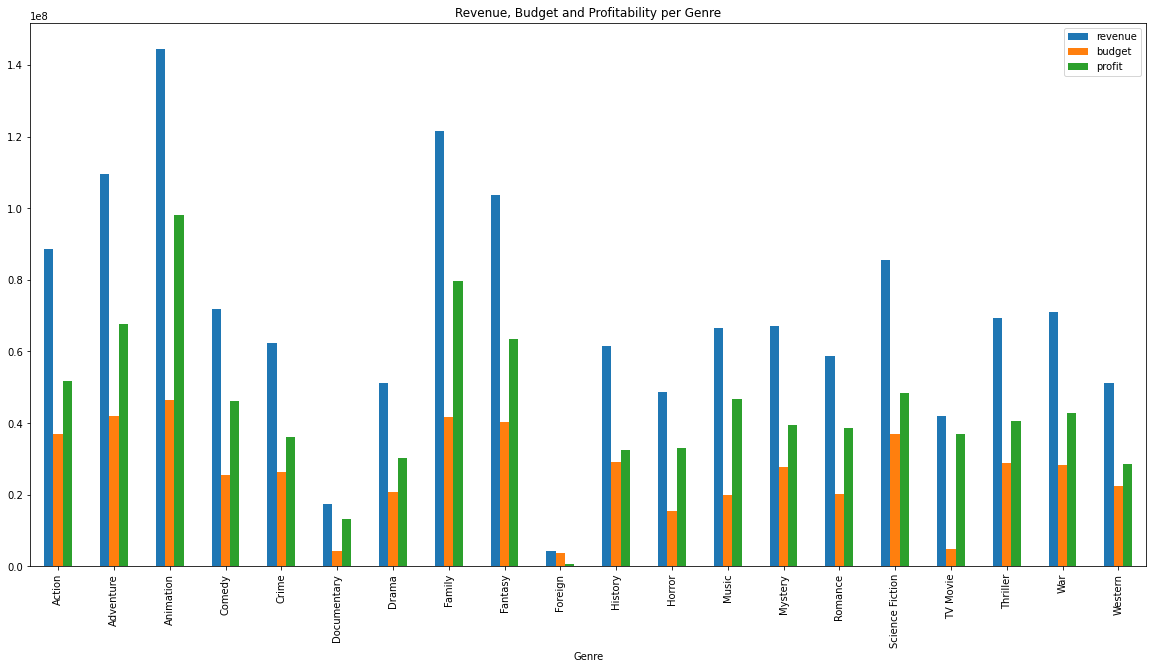

In [60]:
genre_graph = profitability.groupby('name')[['revenue', 'budget', 'profit']].mean().plot(kind='bar', figsize=(20,10),title='Revenue, Budget and Profitability per Genre')
genre_graph.set_xlabel("Genre")

In [62]:
profitability['ROI'] = profitability['profit'] / profitability['budget']

Text(0.5, 0, 'Genre')

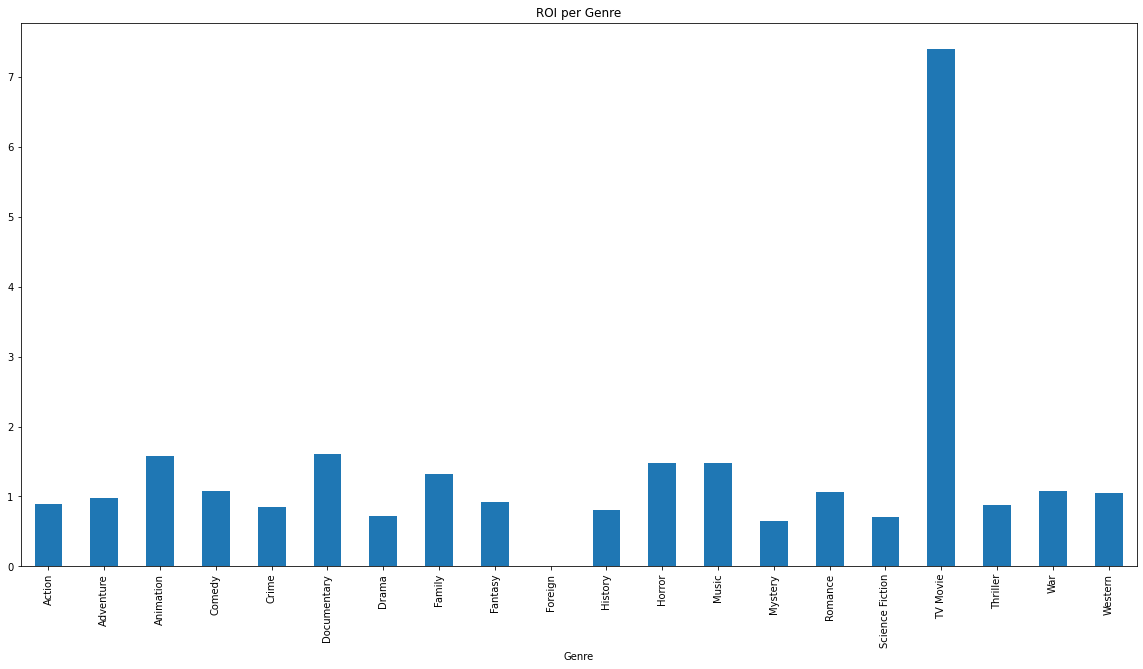

In [63]:
roi_genre_graph = profitability.groupby('name')['ROI'].median().plot(kind='bar', figsize=(20,10),title='ROI per Genre')
roi_genre_graph.set_xlabel("Genre")

In [154]:
crew_table_revenue = crew_table.merge(profitability, left_on='movieID', right_on='id')

In [155]:
#Filter only the latest movies
crew_table_revenue = crew_table_revenue[crew_table_revenue['release_date']>'2010-01-01']

In [156]:
crew_table_revenue = crew_table_revenue.groupby(['department','name'])['revenue'].sum().reset_index()

In [157]:
crew_table_revenue = crew_table_revenue.groupby(['department']).apply(lambda x: x.sort_values(['revenue'],ascending = False)).reset_index(drop = True)

In [165]:
departments = crew_table_revenue['department'].unique()

In [166]:
departments

array(['Art', 'Camera', 'Costume & Make-Up', 'Crew', 'Directing',
       'Editing', 'Lighting', 'Production', 'Sound', 'Visual Effects',
       'Writing'], dtype=object)

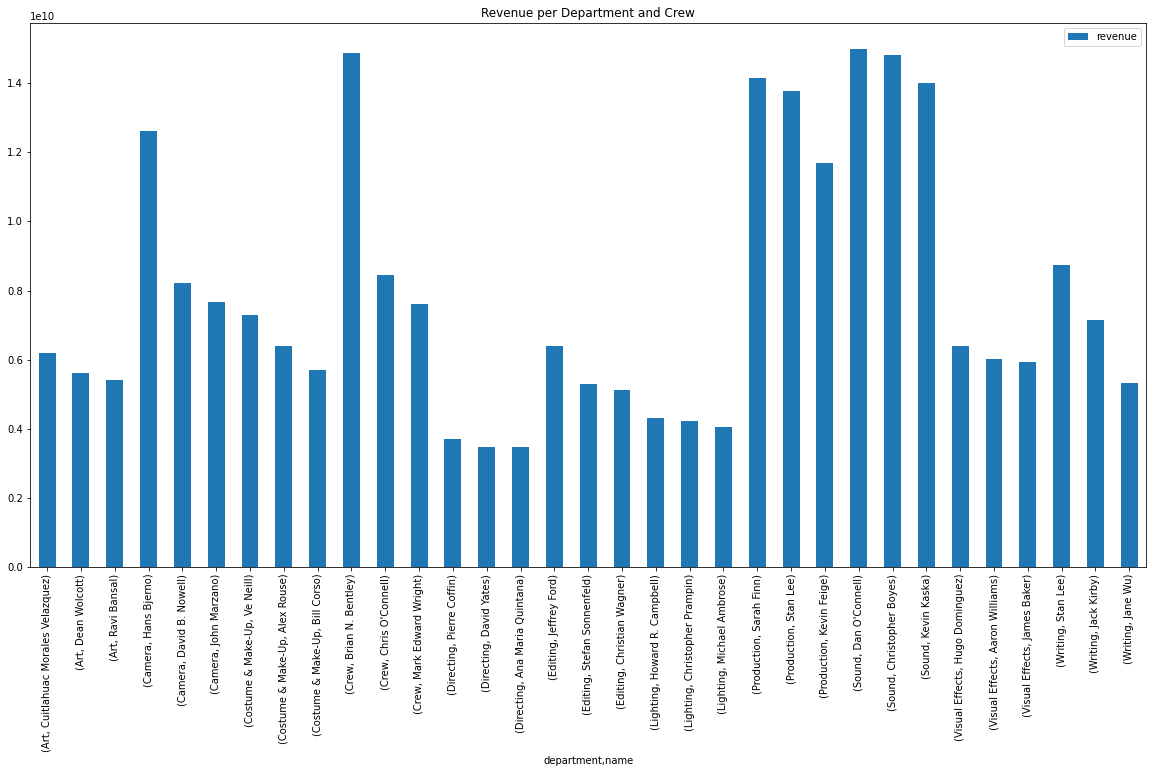

In [179]:
crew_table_revenue.groupby('department').head(3).set_index(['department', 'name']).plot(kind='bar',figsize=(20,10),title='Revenue per Department and Crew')

In [175]:
languages_table_revenue = languages_table.merge(profitability, left_on='movieID', right_on='id')

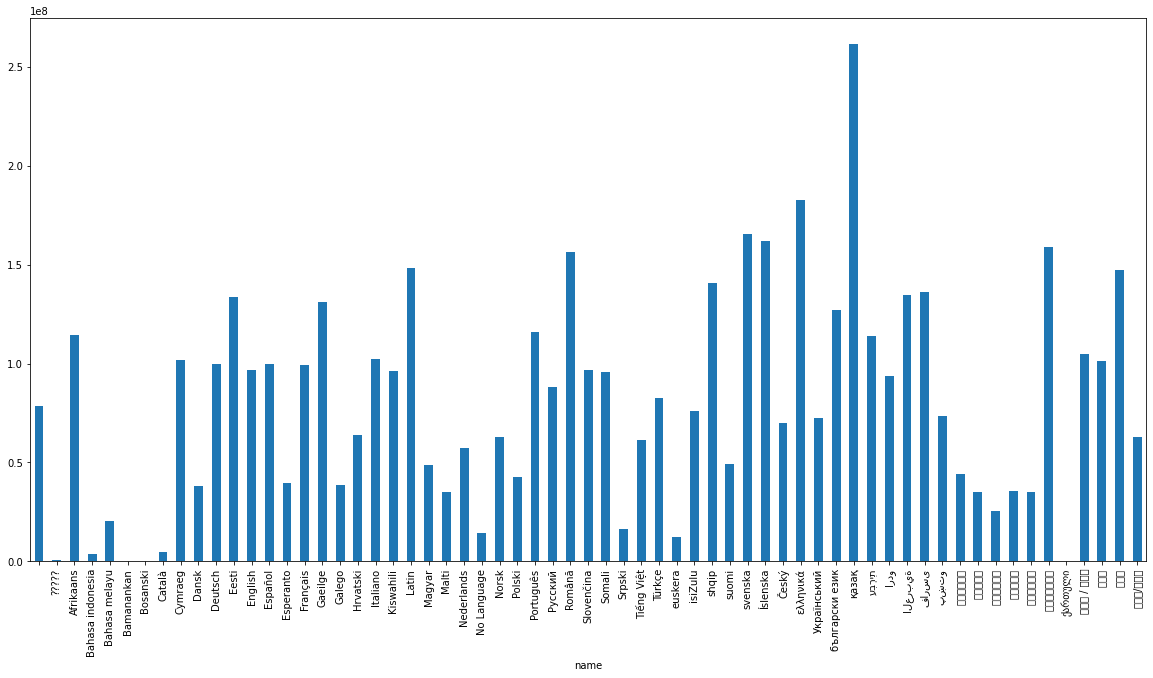

In [180]:
#needs more cleansing. The encoding is probabily incorrectly setup.
languages_table_revenue.groupby('name')['revenue'].mean().plot(kind='bar', figsize=(20,10))

In [183]:
keywords_table_revenue = keywords_table.merge(profitability, left_on='movieID', right_on='id')

In [187]:
keywords_table_revenue = keywords_table_revenue.merge(genres_table,how='inner', left_on='movieID', right_on='movieID', suffixes=['key_', 'gen'])

In [194]:
keywords_table_revenue =keywords_table_revenue.groupby(['namegen','namekey_'])['revenue_x'].mean().reset_index()

In [197]:
keywords_table_revenue = keywords_table_revenue.groupby(['namegen']).apply(lambda x: x.sort_values(['revenue_x'],ascending = False)).reset_index(drop = True)

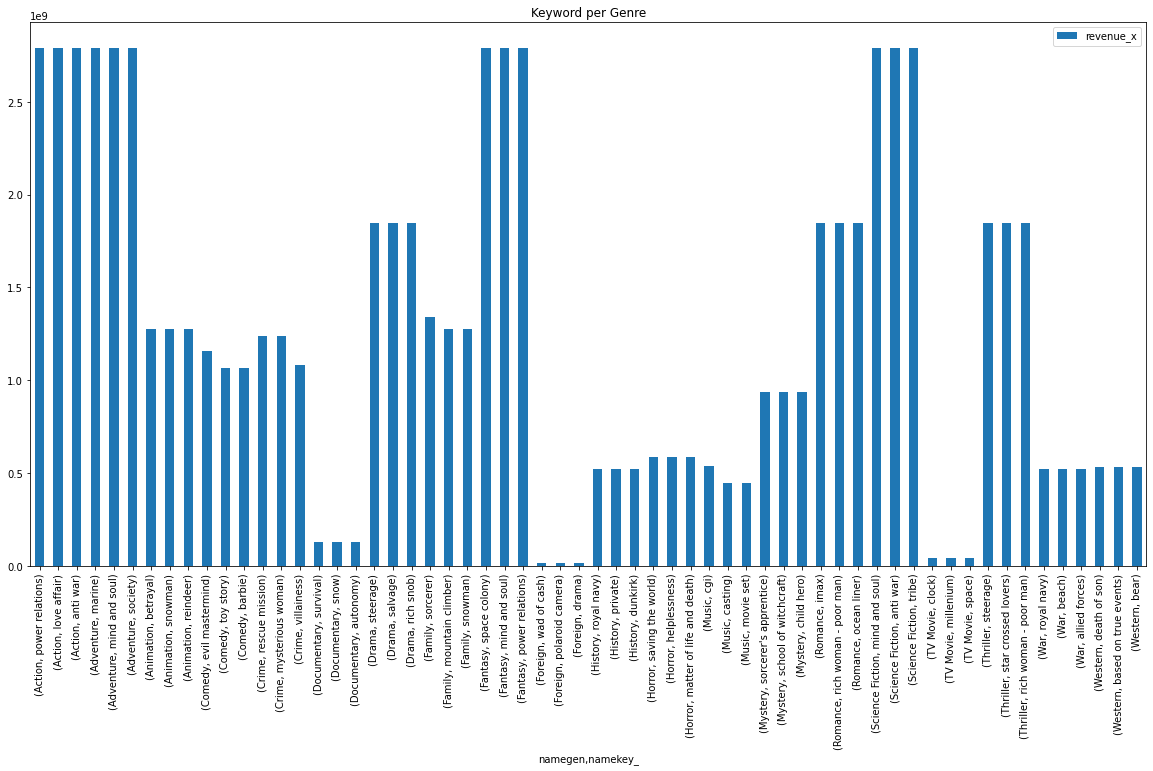

In [199]:
keywords_table_revenue.groupby('namegen').head(3).set_index(['namegen', 'namekey_']).plot(kind='bar',figsize=(20,10),title='Keyword per Genre')